<a href="https://colab.research.google.com/github/mohumedraslan/Handwritten-Digit-Recognition-with-TensorFlow/blob/main/second_try_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , optimizers
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
print(x_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000,)


In [3]:
num_cat =10
y_train_raw = tf.keras.utils.to_categorical(y_train,num_cat)
y_test_raw = tf.keras.utils.to_categorical(y_test,num_cat)
x_test.shape

(10000, 28, 28)

In [4]:

x_train= x_train.reshape(60000,784).astype('float32')/255
x_test= x_test.reshape(10000,784).astype('float32')/255
x_train.shape
x_test.shape

(10000, 784)

In [7]:
model = tf.keras.Sequential ([
    layers.Dense(512, activation='relu',input_dim= 784),
    layers.Dense(256,activation='relu'),
    layers.Dense(124,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=optimizers.Adam(0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train,y_train_raw,batch_size=10,epochs=10,verbose=1)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.9016 - loss: 0.3215
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - accuracy: 0.9696 - loss: 0.1026
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - accuracy: 0.9779 - loss: 0.0723
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9835 - loss: 0.0558
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.9860 - loss: 0.0483
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.9880 - loss: 0.0447
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.9896 - loss: 0.0365
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9911 - loss: 0.0326
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 88s 10ms/step - accuracy: 0.9908 - loss: 0.0326
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.9918 - loss: 0.0312


In [11]:
score = model.evaluate(x_test,y_test_raw,verbose=0)
print(score[0])
score[1]

0.12776045501232147


0.9794999957084656

In [12]:
logdiree = './elking'
if not os.path.exists(logdiree):
  os.mkdir(logdiree)
model.save(logdiree + '/final_model.h5')

In [17]:
x_train = x_train.reshape(60000,28,28)
x_test = x_test.reshape(10000,28,28)
x_train.shape

(60000, 28, 28)

In [27]:
model_cnn = tf.keras.Sequential([
    layers.Conv2D(32,(5,5),activation='relu',strides=(1,1),padding='same',input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2),padding='valid',strides=(1,1),),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPool2D(pool_size=(2,2),padding='valid',strides=(1,1)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_cat,activation='softmax')
])

In [39]:
model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_cnn.fit(x=x_test,y=y_test_raw,epochs=5,batch_size=128)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 704ms/step - accuracy: 0.7195 - loss: 0.8434
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 697ms/step - accuracy: 0.9597 - loss: 0.1370
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 715ms/step - accuracy: 0.9698 - loss: 0.0922
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 80s 693ms/step - accuracy: 0.9820 - loss: 0.0571
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 704ms/step - accuracy: 0.9846 - loss: 0.0495


In [44]:
res_loss,res_accuracy = model_cnn.evaluate(x=x_test,y=y_test_raw)
res_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9952 - loss: 0.0163


0.013021732680499554

In [45]:
logdiree = './elking'
if not os.path.exists(logdiree):
  os.mkdir(logdiree)
model.save(logdiree + '/final_model_cnn.h5')

In [56]:
new_model =tf.keras.models.load_model(logdiree + '/final_model_cnn.h5')
new_model.summary()
x_test =x_test.reshape(10000,784)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 124)                 │          31,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 566,368 (2.16 MB)

 Trainable params: 566,366 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction results of the first 20 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
First 20 images in the test dataset are in the following format:


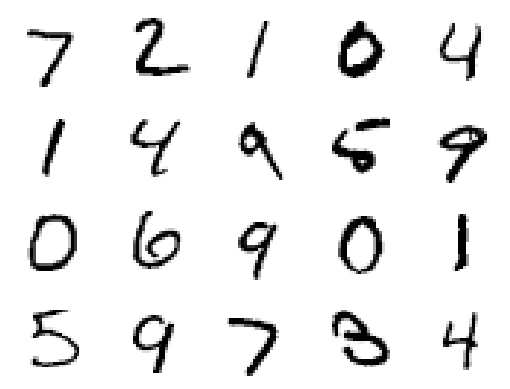

In [58]:
def visual_data(n):
    # Use X_test (already reshaped to (10000, 28, 28, 1)) for CNN compatibility
    predictions = new_model.predict(x_test[0:n])  # Use X_test, not x_test
    max_prediction = np.argmax(predictions, axis=1)

    fig, ax = plt.subplots(nrows=int(n/5), ncols=5)
    ax = ax.flatten()
    print('Prediction results of the first {} images:'.format(n))

    for i in range(n):
        print(max_prediction[i], end=',')
        if (i + 1) % 5 == 0:
            print('\t')
        img = x_test[i].reshape((28, 28))  # Reshape for display (drop channel dim)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].axis("off")
    print('First {} images in the test dataset are in the following format:'.format(n))

    plt.show()

# Call the function
visual_data(20)